PCA  0   1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


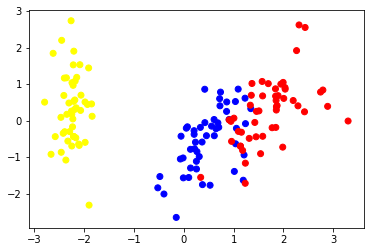

PCA  0   2


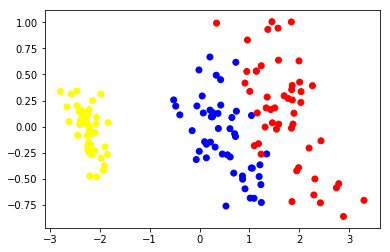

PCA  0   3


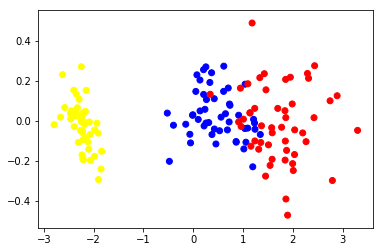

PCA  1   2


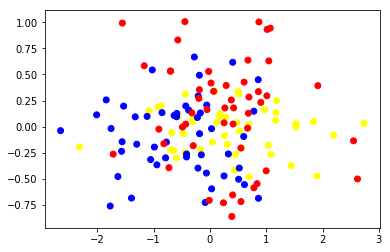

PCA  1   3


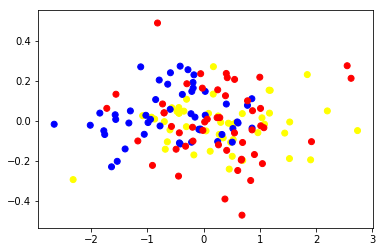

PCA  2   3


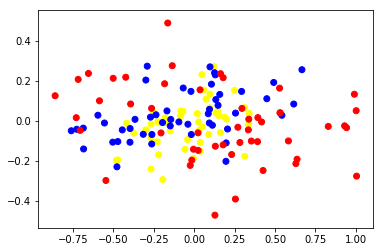

In [20]:
def color(s):
    if s=='Iris-virginica':
        return 'red'
    else:
        if s=='Iris-versicolor':
            return 'blue'
    return 'yellow'


import numpy as np
import pandas as pd
d=pd.read_csv("iris.csv").values
X=d[:,0:4]
y=d[:,4]
from sklearn import preprocessing
d=pd.read_csv("iris.csv").values
from sklearn.decomposition import PCA
from sklearn import preprocessing
XX = preprocessing.scale(X)
X_PCA = PCA(n_components=4).fit_transform(XX)
import matplotlib.pyplot as plt
colors=[color(x) for x in y]
fo=0
for i in range(4):
    for j in range(i+1,4):
        print('PCA ',i,' ',j )
        plt.scatter(X_PCA[:,i], X_PCA[:,j],  c=colors)
        plt.show()

In [21]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
def clasb(s):
    if s=='Iris-virginica':
        return 0
    else:
        if s=='Iris-versicolor':
            return 0
    return 1
fo=0
y1=np.array([clasb(x) for x in y])
for train_index, test_index in skf.split(X, y1):
    print('fold=',fo)
    fo+=1
    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y1[train_index]
    y_test=y1[test_index]
    scaler = StandardScaler()
    XS_train=scaler.fit_transform(X_train) 
    XS_test=scaler.transform(X_test)
    clf = LogisticRegression(random_state=0, solver='lbfgs').fit(XS_train,y_train)
    #clf = LinearSVC(random_state=0, tol=1e-5).fit(XS_train,y_train)
    y_pred=clf.predict(XS_test)
    print('Accuracy', accuracy_score(y_test, y_pred))
    print('confusion matrix',confusion_matrix(y_test, y_pred))
    print('precision recall fscore support',precision_recall_fscore_support(y_test, y_pred))
    

fold= 0
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 1
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 2
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 3
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 4
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 5
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 6
Accuracy 1.0
confusion matrix [[10  0]
 [ 0 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [22]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
def clasb(s):
    if s=='Iris-virginica':
        return 0
    else:
        if s=='Iris-versicolor':
            return 1
    return 0
fo=0
y1=np.array([clasb(x) for x in y])
for train_index, test_index in skf.split(X, y1):
    print('fold=',fo)
    fo+=1
    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y1[train_index]
    y_test=y1[test_index]
    scaler = StandardScaler()
    XS_train=scaler.fit_transform(X_train) 
    XS_test=scaler.transform(X_test)
    clf = LogisticRegression(random_state=0, solver='lbfgs').fit(XS_train,y_train)
    #clf =svm.LinearSVC(random_state=0, tol=1e-5).fit(XS_train,y_train)
    y_pred=clf.predict(XS_test)
    ytr_pred=clf.predict(XS_train)
    print('Accuracy train', accuracy_score(y_train, ytr_pred))
    print('confusion matrix train',confusion_matrix(y_train, ytr_pred))
    print('precision recall fscore support train',precision_recall_fscore_support(y_train, ytr_pred))
    print('Accuracy', accuracy_score(y_test, y_pred))
    print('confusion matrix',confusion_matrix(y_test, y_pred))
    print('precision recall fscore support',precision_recall_fscore_support(y_test, y_pred))
    

fold= 0
Accuracy train 0.7089552238805971
confusion matrix train [[77 12]
 [27 18]]
precision recall fscore support train (array([0.74038462, 0.6       ]), array([0.86516854, 0.4       ]), array([0.79792746, 0.48      ]), array([89, 45]))
Accuracy 0.8666666666666667
confusion matrix [[9 1]
 [1 4]]
precision recall fscore support (array([0.9, 0.8]), array([0.9, 0.8]), array([0.9, 0.8]), array([10,  5]))
fold= 1
Accuracy train 0.7164179104477612
confusion matrix train [[77 12]
 [26 19]]
precision recall fscore support train (array([0.74757282, 0.61290323]), array([0.86516854, 0.42222222]), array([0.80208333, 0.5       ]), array([89, 45]))
Accuracy 0.8
confusion matrix [[9 1]
 [2 3]]
precision recall fscore support (array([0.81818182, 0.75      ]), array([0.9, 0.6]), array([0.85714286, 0.66666667]), array([10,  5]))
fold= 2
Accuracy train 0.7089552238805971
confusion matrix train [[76 13]
 [26 19]]
precision recall fscore support train (array([0.74509804, 0.59375   ]), array([0.85393258, 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [30]:
from sklearn.preprocessing import PolynomialFeatures
degree=3
fo=0
for train_index, test_index in skf.split(X, y1):
    print('fold=',fo)
    fo+=1
    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y1[train_index]
    y_test=y1[test_index]
    scaler = StandardScaler()
    XS_train=scaler.fit_transform(X_train) 
    print(XS_train.shape)
    XS_test=scaler.fit_transform(X_test)
    poly = PolynomialFeatures(degree)
    XSP_train=poly.fit_transform(XS_train)
    print(XSP_train.shape)
    #print(XSK_train)
    XSP_test=poly.fit_transform(XS_test)
    clf = LogisticRegression(random_state=0, solver='lbfgs').fit(XSP_train,y_train)
    #clf =svm.LinearSVC(random_state=0, tol=1e-5).fit(XSk_train,y_train)
    ytr_pred=clf.predict(XSP_train)
    print('Accuracy train', accuracy_score(y_train, ytr_pred))
    print('confusion matrix train',confusion_matrix(y_train, ytr_pred))
    print('precision recall fscore support train',precision_recall_fscore_support(y_train, ytr_pred))
    y_pred=clf.predict(XSP_test)
    print('Accuracy', accuracy_score(y_test, y_pred))
    print('confusion matrix',confusion_matrix(y_test, y_pred))
    print('precision recall fscore support',precision_recall_fscore_support(y_test, y_pred))

fold= 0
(134, 4)
(134, 35)
Accuracy train 0.9776119402985075
confusion matrix train [[88  1]
 [ 2 43]]
precision recall fscore support train (array([0.97777778, 0.97727273]), array([0.98876404, 0.95555556]), array([0.98324022, 0.96629213]), array([89, 45]))
Accuracy 0.9333333333333333
confusion matrix [[9 1]
 [0 5]]
precision recall fscore support (array([1.        , 0.83333333]), array([0.9, 1. ]), array([0.94736842, 0.90909091]), array([10,  5]))
fold= 1
(134, 4)
(134, 35)
Accuracy train 0.9850746268656716
confusion matrix train [[88  1]
 [ 1 44]]
precision recall fscore support train (array([0.98876404, 0.97777778]), array([0.98876404, 0.97777778]), array([0.98876404, 0.97777778]), array([89, 45]))
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 2
(134, 4)
(134, 35)
Accuracy train 0.9776119402985075
confusion matrix train [[87  2]
 [ 1 44]]
precision recall fscore support trai

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

Accuracy train 0.9776119402985075
confusion matrix train [[87  2]
 [ 1 44]]
precision recall fscore support train (array([0.98863636, 0.95652174]), array([0.97752809, 0.97777778]), array([0.98305085, 0.96703297]), array([89, 45]))
Accuracy 0.9333333333333333
confusion matrix [[9 1]
 [0 5]]
precision recall fscore support (array([1.        , 0.83333333]), array([0.9, 1. ]), array([0.94736842, 0.90909091]), array([10,  5]))
fold= 8
(134, 4)
(134, 35)
Accuracy train 0.9776119402985075
confusion matrix train [[87  2]
 [ 1 44]]
precision recall fscore support train (array([0.98863636, 0.95652174]), array([0.97752809, 0.97777778]), array([0.98305085, 0.96703297]), array([89, 45]))
Accuracy 0.9333333333333333
confusion matrix [[9 1]
 [0 5]]
precision recall fscore support (array([1.        , 0.83333333]), array([0.9, 1. ]), array([0.94736842, 0.90909091]), array([10,  5]))
fold= 9
(135, 4)
(135, 35)
Accuracy train 0.9777777777777777
confusion matrix train [[89  1]
 [ 2 43]]
precision recall f

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

PCA  0   1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


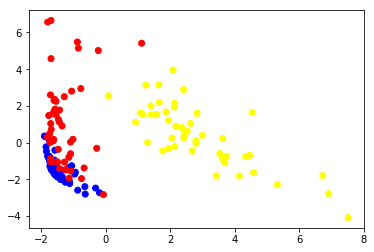

PCA  0   2


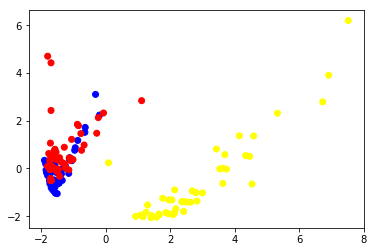

PCA  0   3


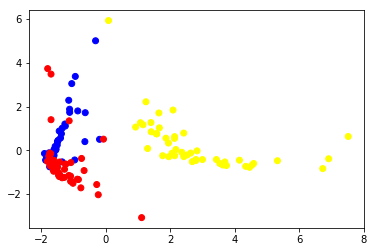

PCA  1   2


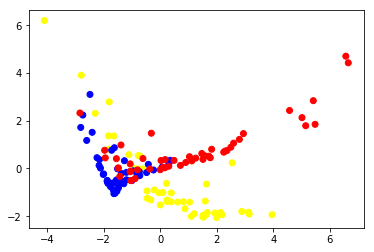

PCA  1   3


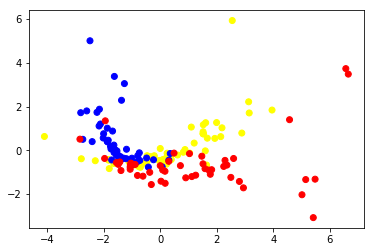

PCA  2   3


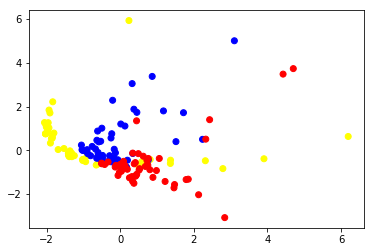

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
d=pd.read_csv("iris.csv").values
from sklearn.decomposition import PCA
from sklearn import preprocessing
XX = preprocessing.scale(X)
poly = PolynomialFeatures(2)
XXSK=poly.fit_transform(XX)
print(XXSK.shape)
X_PCA = PCA(n_components=4).fit_transform(XXSK)
import matplotlib.pyplot as plt
colors=[color(x) for x in y]
for i in range(4):
    for j in range(i+1,4):
        print('PCA ',i,' ',j )
        plt.scatter(X_PCA[:,i], X_PCA[:,j],  c=colors)
        plt.show()

PCA  0   1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


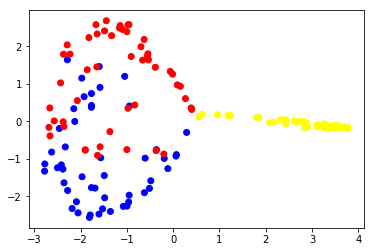

PCA  0   2


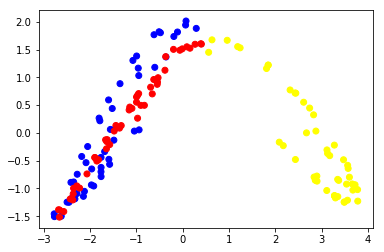

PCA  0   3


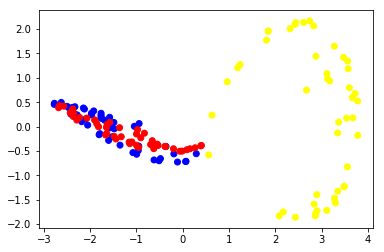

PCA  1   2


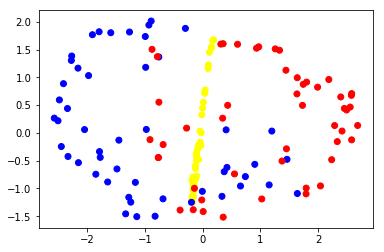

PCA  1   3


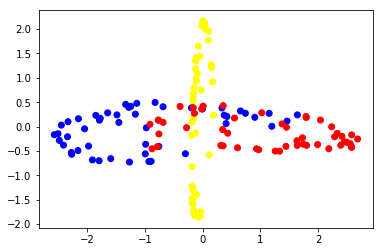

PCA  2   3


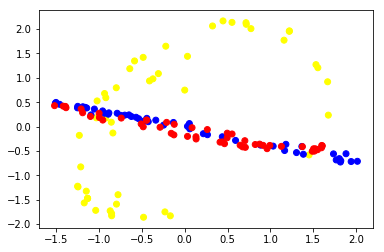

In [27]:
from sklearn import preprocessing
d=pd.read_csv("iris.csv").values
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics.pairwise import rbf_kernel
XX = preprocessing.scale(X)
XXSK=rbf_kernel(XX, gamma=0.8)
X_PCA = PCA(n_components=4).fit_transform(XXSK)
import matplotlib.pyplot as plt
colors=[color(x) for x in y]
for i in range(4):
    for j in range(i+1,4):
        print('PCA ',i,' ',j )
        plt.scatter(X_PCA[:,i], X_PCA[:,j],  c=colors)
        plt.show()

In [56]:
from sklearn.metrics.pairwise import rbf_kernel
gamma=0.9
for train_index, test_index in skf.split(X, y1):
    print('fold=',fo)
    fo+=1
    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y1[train_index]
    y_test=y1[test_index]
    scaler = StandardScaler()
    XS_train=scaler.fit_transform(X_train) 
    XS_test=scaler.transform(X_test)
    XSK_train=rbf_kernel(XS_train, gamma=gamma)
    #print(XSK_train)
    XSK_test=rbf_kernel(XS_test,XS_train, gamma=gamma)
    #clf = LogisticRegression(random_state=0, solver='lbfgs').fit(XSK_train,y_train)
    clf =svm.LinearSVC(random_state=0, tol=1e-5).fit(XSK_train,y_train)
    ytr_pred=clf.predict(XSK_train)
    print('Accuracy train', accuracy_score(y_train, ytr_pred))
    print('confusion matrix train',confusion_matrix(y_train, ytr_pred))
    print('precision recall fscore support train',precision_recall_fscore_support(y_train, ytr_pred))
    y_pred=clf.predict(XSK_test)
    print('Accuracy', accuracy_score(y_test, y_pred))
    print('confusion matrix',confusion_matrix(y_test, y_pred))
    print('precision recall fscore support',precision_recall_fscore_support(y_test, y_pred))

fold= 11
Accuracy train 1.0
confusion matrix train [[90  0]
 [ 0 44]]
precision recall fscore support train (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([90, 44]))
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 12
Accuracy train 1.0
confusion matrix train [[90  0]
 [ 0 44]]
precision recall fscore support train (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([90, 44]))
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 13
Accuracy train 1.0
confusion matrix train [[90  0]
 [ 0 44]]
precision recall fscore support train (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([90, 44]))
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 14
Accuracy t

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

PCA  0   1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


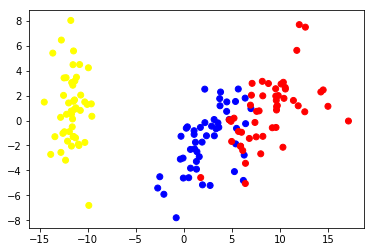

PCA  0   2


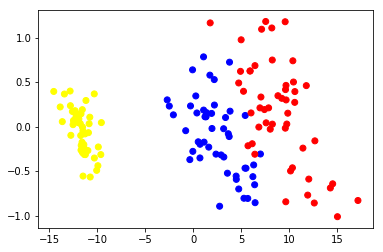

PCA  0   3


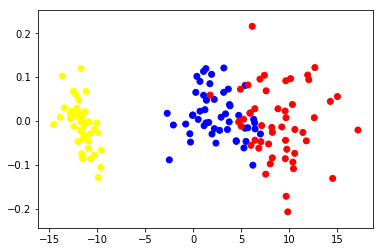

PCA  1   2


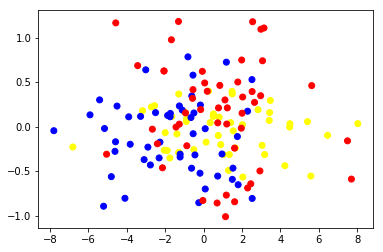

PCA  1   3


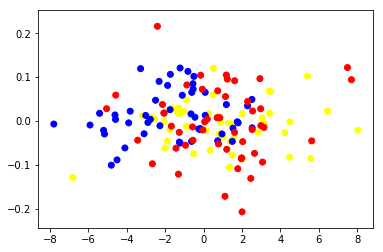

PCA  2   3


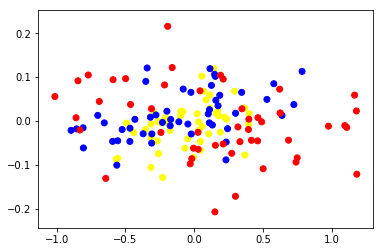

In [55]:
from sklearn import preprocessing
d=pd.read_csv("iris.csv").values
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics.pairwise import polynomial_kernel
XX = preprocessing.scale(X)
XXSK=polynomial_kernel(XX, degree=1)
#XXSK= preprocessing.normalize(XXSK, norm='l2')
X_PCA = PCA(n_components=4).fit_transform(XXSK)
import matplotlib.pyplot as plt
colors=[color(x) for x in y]
for i in range(4):
    for j in range(i+1,4):
        print('PCA ',i,' ',j )
        plt.scatter(X_PCA[:,i], X_PCA[:,j],  c=colors)
        plt.show()

In [51]:
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn import preprocessing
degree=1
for train_index, test_index in skf.split(X, y1):
    print('fold=',fo)
    fo+=1
    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y1[train_index]
    y_test=y1[test_index]
    scaler = StandardScaler()
    XS_train=scaler.fit_transform(X_train) 
    XS_test=scaler.transform(X_test)
    norm='l2'
    XS_train=preprocessing.normalize(XS_train, norm=norm)
    XS_test=preprocessing.normalize(XS_test, norm=norm)
    XSK_train=polynomial_kernel(XS_train, degree=degree)
    #print(XSK_train)
    XSK_test=polynomial_kernel(XS_test,XS_train, degree=degree)
    clf = LogisticRegression(random_state=0, solver='lbfgs').fit(XSK_train,y_train)
    #clf =svm.LinearSVC(random_state=0, tol=1e-5).fit(XSk_train,y_train)
    ytr_pred=clf.predict(XSK_train)
    print('Accuracy train', accuracy_score(y_train, ytr_pred))
    print('confusion matrix train',confusion_matrix(y_train, ytr_pred))
    print('precision recall fscore support train',precision_recall_fscore_support(y_train, ytr_pred))
    y_pred=clf.predict(XSK_test)
    print('Accuracy', accuracy_score(y_test, y_pred))
    print('confusion matrix',confusion_matrix(y_test, y_pred))
    print('precision recall fscore support',precision_recall_fscore_support(y_test, y_pred))

fold= 90
Accuracy train 0.7910447761194029
confusion matrix train [[78 11]
 [17 28]]
precision recall fscore support train (array([0.82105263, 0.71794872]), array([0.87640449, 0.62222222]), array([0.84782609, 0.66666667]), array([89, 45]))
Accuracy 0.9333333333333333
confusion matrix [[9 1]
 [0 5]]
precision recall fscore support (array([1.        , 0.83333333]), array([0.9, 1. ]), array([0.94736842, 0.90909091]), array([10,  5]))
fold= 91
Accuracy train 0.8208955223880597
confusion matrix train [[79 10]
 [14 31]]
precision recall fscore support train (array([0.84946237, 0.75609756]), array([0.88764045, 0.68888889]), array([0.86813187, 0.72093023]), array([89, 45]))
Accuracy 0.7333333333333333
confusion matrix [[8 2]
 [2 3]]
precision recall fscore support (array([0.8, 0.6]), array([0.8, 0.6]), array([0.8, 0.6]), array([10,  5]))
fold= 92
Accuracy train 0.8059701492537313
confusion matrix train [[77 12]
 [14 31]]
precision recall fscore support train (array([0.84615385, 0.72093023]), a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [53]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
def clasb(s):
    if s=='Iris-virginica':
        return 0
    else:
        if s=='Iris-versicolor':
            return 0
    return 1
fo=0
y1=np.array([clasb(x) for x in y])
for train_index, test_index in skf.split(X, y1):
    print('fold=',fo)
    fo+=1
    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y1[train_index]
    y_test=y1[test_index]
    scaler = StandardScaler()
    XS_train=scaler.fit_transform(X_train) 
    XS_test=scaler.transform(X_test)
    'scale'
    clf = svm.SVC(C=1.0, degree=3, gamma=0.9, kernel='rbf',).fit(XS_train,y_train)
    y_pred=clf.predict(XS_test)
    print('Accuracy', accuracy_score(y_test, y_pred))
    print('confusion matrix',confusion_matrix(y_test, y_pred))
    print('precision recall fscore support',precision_recall_fscore_support(y_test, y_pred))
    

fold= 0
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 1
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 2
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 3
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 4
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 5
Accuracy 1.0
confusion matrix [[10  0]
 [ 0  5]]
precision recall fscore support (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([10,  5]))
fold= 6
Accuracy 0.9333333333333333
confusion matrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni